# 1] Feature Transformation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('E:\All Datasets\\titanic.csv',usecols=['Fare'])
data
# data.Fare   or  data.['Fare']

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [3]:
# Take sample from population
t=data['Fare'].sample(10)
pd.DataFrame(t)

,Fare
419,24.1500
352,7.2292
519,7.8958
477,7.0458
69,8.6625
342,13.0000
441,9.5000
327,13.0000
277,0.0000
284,26.0000


In [4]:
data['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

4.787316519674893

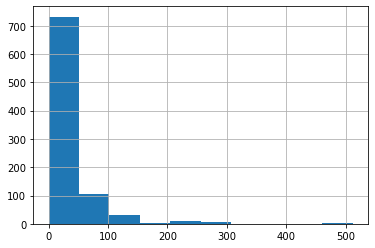

In [5]:
data.Fare.hist()
data.Fare.skew()      # mostly positively skewed

## skewness is 0  normal dist
# skewness is less than -1  then negative skew
# skewness is greater than +1 then positively skewed distribution

# (-1 to 1 considering it nearly normal)

## Root Transformation


0.00982006067812734

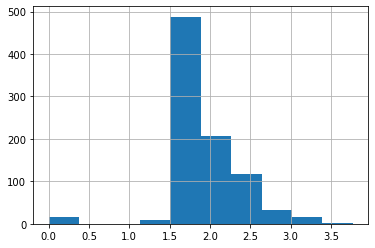

In [6]:
data['sqr_Fare']=data['Fare']**(1/4.7)   # here adjusting the nth root(now skewness is nearly zeo)
data['sqr_Fare'].hist()
data['sqr_Fare'].skew()  

### Logarithmic Transformation

0.3949280095189306

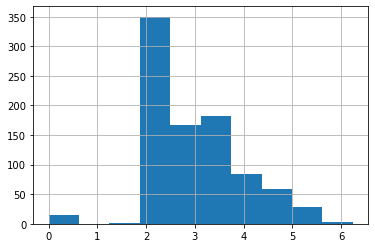

In [7]:
data['Log_Fare']=np.log(data['Fare']+1)   # log zero is infinite hence we plus 1 here
data['Log_Fare'].hist()
data['Log_Fare'].skew()

In [8]:
# it comes nearly zero but not far good as nth root
# means nth root is better than log (in this eg)

### Reciprocal transformation

6.357430008713971

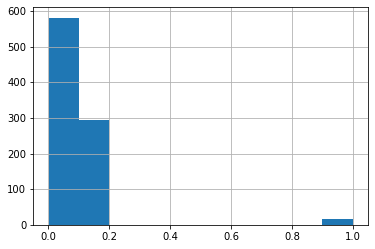

In [9]:
data['Rec_Fare']=1/(data['Fare']+1)
data['Rec_Fare'].hist()
data['Rec_Fare'].skew()      # this not good

### BoxCox transformation

In [10]:
from scipy import stats

In [11]:
# transform trainig data and save the lamda value
data['Fare_Boxcox'],lam=stats.boxcox(data.Fare+1)
#data['Fare_Boxcox'].hist()
data['Fare_Boxcox'].skew()

# it is also good noramlised

-0.04032918275876294

In [12]:
# unskewed data is Fare


In [13]:
data.head()

,Fare,sqr_Fare,Log_Fare,Rec_Fare,Fare_Boxcox
0,7.2500,1.524230,2.110213,0.121212,1.906724
1,71.2833,2.478864,4.280593,0.013834,3.497640
2,7.9250,1.553375,2.188856,0.112045,1.970459
3,53.1000,2.328313,3.990834,0.018484,3.304258
4,8.0500,1.558556,2.202765,0.110497,1.981680


# 2] feature Scaling

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# first read file the and remove NaN values 
df=pd.read_csv('E:\All Datasets\\titanic.csv',usecols=['Age'])
df.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [16]:
df.isnull().sum()

Age    177
dtype: int64

In [17]:
## if null value is present then fillna with median bcz if outlier is available it affects
df.Age.fillna(df.Age.median(),inplace=True)

In [18]:
df.isnull().sum()
# here null is not avilable

Age    0
dtype: int64

## Standardiasation

In [19]:
from sklearn.preprocessing import StandardScaler

## call the function
sc=StandardScaler()

# fit_transform 
df['Age_sc']=sc.fit_transform(df[['Age']])
df

,Age,Age_sc
0,22.0,-0.565736
1,38.0,0.663861
2,26.0,-0.258337
3,35.0,0.433312
4,35.0,0.433312
...,...,...
886,27.0,-0.181487
887,19.0,-0.796286
888,28.0,-0.104637
889,26.0,-0.258337


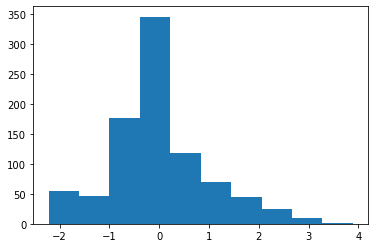

In [20]:
# checking the given function(scaling down func) is normal or not
plt.hist(df['Age_sc'])
plt.show()

In [21]:
df['Age'].skew()

0.5102446555756495

In [22]:
df['Age_sc'].skew()   # it is nearly normal

0.5102446555756486

In [23]:
df

,Age,Age_sc
0,22.0,-0.565736
1,38.0,0.663861
2,26.0,-0.258337
3,35.0,0.433312
4,35.0,0.433312
...,...,...
886,27.0,-0.181487
887,19.0,-0.796286
888,28.0,-0.104637
889,26.0,-0.258337


In [24]:
# standardisation is complete now Normlisation have three types

## Normalization 

- **1)min_max scaling**
- **2)Robust scaling**
- **3)Maxabs scaling**

In [25]:
# 1) Min_Max Sacling (cnn -deep learnig use widely)

from sklearn.preprocessing import MinMaxScaler

# callfun
min_max=MinMaxScaler()

# fit_transform

df['Age_mm']=min_max.fit_transform(df[['Age']])

In [26]:
df

,Age,Age_sc,Age_mm
0,22.0,-0.565736,0.271174
1,38.0,0.663861,0.472229
2,26.0,-0.258337,0.321438
3,35.0,0.433312,0.434531
4,35.0,0.433312,0.434531
...,...,...,...
886,27.0,-0.181487,0.334004
887,19.0,-0.796286,0.233476
888,28.0,-0.104637,0.346569
889,26.0,-0.258337,0.321438


In [27]:
# now checking 
df['Age_mm'].skew()    # it is also normal

0.5102446555756501

In [28]:
#2) Robust Scaling

from sklearn.preprocessing import RobustScaler

# call func
rs=RobustScaler()

# fit_transform 
df['Age_rs']=rs.fit_transform(df[['Age']])

In [29]:
df

,Age,Age_sc,Age_mm,Age_rs
0,22.0,-0.565736,0.271174,-0.461538
1,38.0,0.663861,0.472229,0.769231
2,26.0,-0.258337,0.321438,-0.153846
3,35.0,0.433312,0.434531,0.538462
4,35.0,0.433312,0.434531,0.538462
...,...,...,...,...
886,27.0,-0.181487,0.334004,-0.076923
887,19.0,-0.796286,0.233476,-0.692308
888,28.0,-0.104637,0.346569,0.000000
889,26.0,-0.258337,0.321438,-0.153846


In [30]:
df['Age_rs'].skew()  # it is also normal

0.5102446555756489

In [31]:
#3) MaxAbsscaling

In [32]:
from sklearn.preprocessing import MaxAbsScaler

# call func
mas=MaxAbsScaler()

# fit_transform
df['Age_mas']=mas.fit_transform(df[['Age']])

In [33]:
df

,Age,Age_sc,Age_mm,Age_rs,Age_mas
0,22.0,-0.565736,0.271174,-0.461538,0.2750
1,38.0,0.663861,0.472229,0.769231,0.4750
2,26.0,-0.258337,0.321438,-0.153846,0.3250
3,35.0,0.433312,0.434531,0.538462,0.4375
4,35.0,0.433312,0.434531,0.538462,0.4375
...,...,...,...,...,...
886,27.0,-0.181487,0.334004,-0.076923,0.3375
887,19.0,-0.796286,0.233476,-0.692308,0.2375
888,28.0,-0.104637,0.346569,0.000000,0.3500
889,26.0,-0.258337,0.321438,-0.153846,0.3250


# 3] Feature Encoding

**converting discrete categorical data into numerical value**
- nominal categorical data
- oridinal categorical data

**1) get_dummies**

In [57]:
df=pd.read_csv("E:\All Datasets\\homeprices.csv")
df

,town,area,price
0,Chennai,2600,5500000
1,Chennai,3000,5650000
2,Chennai,3200,6100000
3,Chennai,3600,6800000
4,Bangalore,2600,5850000
5,Bangalore,2800,6150000
6,Bangalore,3300,6500000
7,Bangalore,3600,7100000
8,Hyderabad,2600,5750000
9,Hyderabad,2900,6000000


In [58]:
df=pd.get_dummies(df,drop_first=False)
df

,area,price,town_Bangalore,town_Chennai,town_Hyderabad
0,2600,5500000,0,1,0
1,3000,5650000,0,1,0
2,3200,6100000,0,1,0
3,3600,6800000,0,1,0
4,2600,5850000,1,0,0
5,2800,6150000,1,0,0
6,3300,6500000,1,0,0
7,3600,7100000,1,0,0
8,2600,5750000,0,0,1
9,2900,6000000,0,0,1


**2) OneHotEncoding using sklearn**

In [59]:
# first read the given data
df=pd.read_csv("E:\All Datasets\\homeprices.csv")


In [60]:
from sklearn.preprocessing import OneHotEncoder

#call the function
enc=OneHotEncoder()

# fit and trnsform   
# here we convert data into dataframe
enc_df=pd.DataFrame(enc.fit_transform(df[['town']]).toarray())

In [61]:
enc_df

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


In [62]:
# now merge with the original data
df_org_enc=pd.concat([df,enc_df],axis='columns')

In [63]:
# now drop the original column means categorical data column
df_org_enc.drop('town',axis='columns',inplace=True)
df_org_enc

# here we drop the column of categorical variable

,area,price,0,1,2
0,2600,5500000,0.0,1.0,0.0
1,3000,5650000,0.0,1.0,0.0
2,3200,6100000,0.0,1.0,0.0
3,3600,6800000,0.0,1.0,0.0
4,2600,5850000,1.0,0.0,0.0
5,2800,6150000,1.0,0.0,0.0
6,3300,6500000,1.0,0.0,0.0
7,3600,7100000,1.0,0.0,0.0
8,2600,5750000,0.0,0.0,1.0
9,2900,6000000,0.0,0.0,1.0


## Ordinal Categorical ----> Numerical

### 1.LabelEncoder
- convert numeric as per alphabetical order

In [44]:
df=pd.read_csv("E:\All Datasets\\homeprices.csv")
df

,town,area,price
0,Chennai,2600,5500000
1,Chennai,3000,5650000
2,Chennai,3200,6100000
3,Chennai,3600,6800000
4,Bangalore,2600,5850000
5,Bangalore,2800,6150000
6,Bangalore,3300,6500000
7,Bangalore,3600,7100000
8,Hyderabad,2600,5750000
9,Hyderabad,2900,6000000


In [45]:
from sklearn.preprocessing import LabelEncoder

# call the func
le=LabelEncoder()

# fit and transform

df['town']=le.fit_transform(df['town'])    # alphabet wise
df

,town,area,price
0,1,2600,5500000
1,1,3000,5650000
2,1,3200,6100000
3,1,3600,6800000
4,0,2600,5850000
5,0,2800,6150000
6,0,3300,6500000
7,0,3600,7100000
8,2,2600,5750000
9,2,2900,6000000


### Ordinal Encoder
- convert to numeric as per given order in the function(ascending order)


In [47]:
df=pd.read_csv("E:\All Datasets\\homeprices.csv")
df

,town,area,price
0,Chennai,2600,5500000
1,Chennai,3000,5650000
2,Chennai,3200,6100000
3,Chennai,3600,6800000
4,Bangalore,2600,5850000
5,Bangalore,2800,6150000
6,Bangalore,3300,6500000
7,Bangalore,3600,7100000
8,Hyderabad,2600,5750000
9,Hyderabad,2900,6000000


In [48]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['town']=oe.fit_transform(df[['town']])
df

,town,area,price
0,1.0,2600,5500000
1,1.0,3000,5650000
2,1.0,3200,6100000
3,1.0,3600,6800000
4,0.0,2600,5850000
5,0.0,2800,6150000
6,0.0,3300,6500000
7,0.0,3600,7100000
8,2.0,2600,5750000
9,2.0,2900,6000000


### map() using pandas
- convert numeric as per your choice

In [49]:
df=pd.read_csv("E:\All Datasets\\homeprices.csv")

df['town']=df['town'].map({'Bangalore':0,'Hyderabad':1,'Chennai':2})
df

,town,area,price
0,2,2600,5500000
1,2,3000,5650000
2,2,3200,6100000
3,2,3600,6800000
4,0,2600,5850000
5,0,2800,6150000
6,0,3300,6500000
7,0,3600,7100000
8,1,2600,5750000
9,1,2900,6000000


# discretization / binning

In [50]:
stroke_data=pd.read_csv("E:\All Datasets\\stroke prediction.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [51]:
stroke_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [52]:
stroke_data.age.value_counts()

51.00    738
52.00    721
53.00    701
78.00    698
50.00    694
        ... 
0.48      37
0.40      35
1.00      34
0.16      26
0.08      17
Name: age, Length: 104, dtype: int64

**Creating Bins**

In [53]:
intervals=[0,12,19,30,60,90]

categories=['child','teenager','young_adult','middle_aged','senior_citizen']

stroke_data['age_category']=pd.cut(x=stroke_data['age'],bins=intervals,labels=categories)
stroke_data['age_category']

0                 child
1           middle_aged
2                 child
3        senior_citizen
4              teenager
              ...      
43395             child
43396       middle_aged
43397    senior_citizen
43398       middle_aged
43399    senior_citizen
Name: age_category, Length: 43400, dtype: category
Categories (5, object): ['child' < 'teenager' < 'young_adult' < 'middle_aged' < 'senior_citizen']

In [54]:
stroke_data[['age','age_category']]

,age,age_category
0,3.0,child
1,58.0,middle_aged
2,8.0,child
3,70.0,senior_citizen
4,14.0,teenager
...,...,...
43395,10.0,child
43396,56.0,middle_aged
43397,82.0,senior_citizen
43398,40.0,middle_aged
